In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Winter Project/development.csv")
df_eval=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Winter Project/evaluation.csv")

# 1. Pre-processing

## 1.1 General pre-processing

In [45]:
len(df)

385500

In [3]:
df.isna().any(axis=0).sum()

0

No missing value

In [46]:
all(df.dtypes == 'float64')

True

All columns are numerical

In [47]:
tuples = df.groupby(['x', 'y']).size().reset_index(name='count')
tuples

,x,y,count
0,200.0,200.0,100
1,200.0,220.0,100
2,200.0,225.0,100
3,200.0,230.0,100
4,200.0,235.0,100
...,...,...,...
3850,600.0,575.0,100
3851,600.0,580.0,100
3852,600.0,585.0,100
3853,600.0,590.0,100


In [48]:
(tuples['count'] == 100).all()

True

## 1.2 Identify and delete noise

### 1.2.1 Analysis on the columns

In [4]:
def analysis_columns(columns):
  summary_df = pd.DataFrame({
    'min': df[columns].min(axis=0),
    'max': df[columns].max(axis=0),
    'q10': np.quantile(df[columns], 0.10, axis=0),
    'q25': np.quantile(df[columns], 0.25, axis=0),
    'q50': np.quantile(df[columns], 0.50, axis=0),
    'q75': np.quantile(df[columns], 0.75, axis=0),
    'q90': np.quantile(df[columns], 0.9, axis=0),
    'mean': df[columns].mean()
})
  return summary_df

In [5]:
analysis_columns([f'pmax[{i}]' for i in range(18)])

,min,max,q10,q25,q50,q75,q90,mean
pmax[0],1.394440,20.515415,3.670847,4.123941,4.668321,5.265888,5.896406,4.866423
pmax[1],2.028134,106.649066,4.509566,5.619728,10.068513,19.031319,41.743992,16.510543
pmax[2],1.799435,68.837366,4.061718,4.681271,5.714713,9.796498,16.953649,8.784017
pmax[3],2.034311,136.658588,6.145004,9.327397,15.071468,36.166834,68.391295,26.457888
pmax[4],1.940271,90.635233,4.603613,5.744334,10.180335,17.985703,33.932650,14.947826
pmax[5],2.476239,138.381650,11.727238,15.949420,28.257567,58.928515,82.226369,39.333002
pmax[6],1.883002,128.199008,4.461506,5.402504,8.674725,16.197600,32.921815,14.907669
pmax[7],1.591489,19.777481,3.650062,4.106779,4.649773,5.249033,5.881924,4.849883
pmax[8],1.440403,128.185635,4.736248,6.471845,12.660268,25.451260,50.853146,20.503279
pmax[9],1.727530,115.566028,4.160763,4.919528,6.996239,13.679469,25.472580,12.505530


In [6]:
analysis_columns([f'negpmax[{i}]' for i in range(18)])

,min,max,q10,q25,q50,q75,q90,mean
negpmax[0],-7741.109923,-0.745816,-5.915761,-5.257178,-4.646420,-4.093211,-3.623067,-5.046162
negpmax[1],-9930.114637,-1.054508,-21.388307,-8.114323,-5.229009,-4.387686,-3.818330,-9.187917
negpmax[2],-10777.684263,74827.377234,-7.453072,-5.674350,-4.873082,-4.245788,-3.743944,-5.596777
negpmax[3],-25502.557774,-1.156628,-38.236862,-17.757946,-6.060133,-4.680508,-4.004256,-13.964902
negpmax[4],-42648.221376,-0.876505,-17.866047,-7.387660,-5.324010,-4.506516,-3.934842,-8.454200
negpmax[5],-2135.126117,-1.237840,-47.003416,-31.219964,-12.875058,-6.209676,-4.784403,-20.186649
negpmax[6],-10967.680437,-0.875259,-18.826645,-6.977056,-5.244839,-4.469461,-3.915554,-8.814084
negpmax[7],-63107.687949,-1.206569,-5.991412,-5.323495,-4.704361,-4.144341,-3.672504,-5.309727
negpmax[8],-86543.677185,-0.010708,-28.792393,-12.788780,-5.826880,-4.782032,-4.159465,-12.218777
negpmax[9],-30718.927252,-0.771518,-15.093580,-6.429401,-5.184883,-4.470182,-3.936148,-8.171642


In [7]:
df[[f'negpmax[{i}]' for i in range(18)]].apply(lambda x: (x > 0).sum())

negpmax[0]     0
negpmax[1]     0
negpmax[2]     2
negpmax[3]     0
negpmax[4]     0
negpmax[5]     0
negpmax[6]     0
negpmax[7]     0
negpmax[8]     0
negpmax[9]     0
negpmax[10]    0
negpmax[11]    0
negpmax[12]    1
negpmax[13]    0
negpmax[14]    1
negpmax[15]    1
negpmax[16]    0
negpmax[17]    0
dtype: int64

In [8]:
analysis_columns([f'area[{i}]' for i in range(18)])

,min,max,q10,q25,q50,q75,q90,mean
area[0],-0.582573,149.589043,1.790789,2.383830,3.361071,5.104368,7.756115,4.330495
area[1],-0.997301,152.517700,2.937800,4.755876,7.886552,12.945553,22.973449,10.504198
area[2],-1.735430,136.872156,2.188016,3.116460,4.944174,7.888534,11.920911,6.288025
area[3],-0.465472,217.158246,4.696327,6.900497,10.510014,20.451969,34.930986,15.282057
area[4],-0.498636,104.968125,2.965227,4.703120,7.580626,12.014731,19.440167,9.521325
area[5],-0.286943,137.897479,8.044242,10.925126,17.630692,30.914978,41.523082,21.714331
area[6],-1.575635,117.330137,2.706822,4.133098,6.787136,10.984367,19.214470,9.296706
area[7],-1.572485,144.933251,1.821860,2.407937,3.338088,4.972504,7.488059,4.236358
area[8],-1.242195,148.486123,3.203392,5.283902,8.622237,14.814062,26.205279,11.857352
area[9],-2.207168,96.623736,2.334573,3.462256,5.753338,9.392292,15.263597,7.843535


In [9]:
analysis_columns([f'tmax[{i}]' for i in range(18)])

,min,max,q10,q25,q50,q75,q90,mean
tmax[0],0.000000,204.600000,19.600000,46.400000,90.600000,151.026985,182.200000,97.593811
tmax[1],0.000000,204.600000,70.600000,71.200000,71.800000,72.400000,102.600000,77.383326
tmax[2],0.000000,204.600000,38.107362,71.000000,71.992175,86.400000,160.000000,84.221963
tmax[3],0.000000,204.600000,70.800000,71.060475,71.600000,72.200000,72.400000,72.975241
tmax[4],0.000000,204.600000,70.600000,71.000000,71.600000,72.222858,101.800000,77.332988
tmax[5],0.000000,204.600000,70.600000,71.000000,71.400000,72.000000,72.200000,71.544003
tmax[6],0.000000,204.600000,70.200000,70.800000,71.400000,72.043500,121.421137,78.324800
tmax[7],0.000000,204.600000,18.600000,46.081232,91.600000,151.800000,182.400000,97.900006
tmax[8],0.000000,204.600000,70.758937,71.200000,71.800000,72.400000,73.200000,75.949070
tmax[9],0.000000,204.600000,54.000000,71.000000,71.800000,72.600000,140.800000,80.758572


In [10]:
analysis_columns([f'rms[{i}]' for i in range(18)])

,min,max,q10,q25,q50,q75,q90,mean
rms[0],0.275854,6.088277,0.919590,1.096611,1.316209,1.557156,1.794000,1.340462
rms[1],0.314711,5.860626,0.915197,1.092676,1.311898,1.552595,1.786320,1.335660
rms[2],0.254500,5.195023,0.928290,1.109390,1.333165,1.577739,1.815515,1.356628
rms[3],0.283914,5.550556,0.907895,1.084392,1.301515,1.541693,1.774300,1.325691
rms[4],0.317826,6.038189,0.940766,1.123985,1.350173,1.601313,1.842428,1.375895
rms[5],0.270687,5.669777,0.928693,1.112065,1.338970,1.588144,1.830997,1.363732
rms[6],0.316127,5.463565,0.937492,1.120746,1.347503,1.596552,1.839078,1.371803
rms[7],0.239211,5.872917,0.912831,1.095444,1.321517,1.571322,1.813134,1.346945
rms[8],0.319754,6.390013,0.954008,1.138205,1.365886,1.614668,1.857275,1.389921
rms[9],0.294681,5.982645,0.947728,1.129018,1.353291,1.598699,1.837926,1.377497


### 1.2.2 Plotting the columns

In [11]:
def plot_data(columns_name):
    fig, ax = plt.subplots(6, 3, figsize=(15, 10))

    n=2000

    df_reset = df.reset_index()
    df_downsampled = df_reset.iloc[::n, :]

    for i in range(6):
        for j in range(3):
            column = f'{columns_name}[{i * 3 + j}]'
            ax[i, j].plot(df_downsampled['index'], df_downsampled[column], label=column)
            ax[i, j].set_xticks(np.arange(0, len(df_reset.index), step=100000))
            ax[i, j].grid()
            ax[i, j].legend()

    plt.tight_layout()
    plt.show()

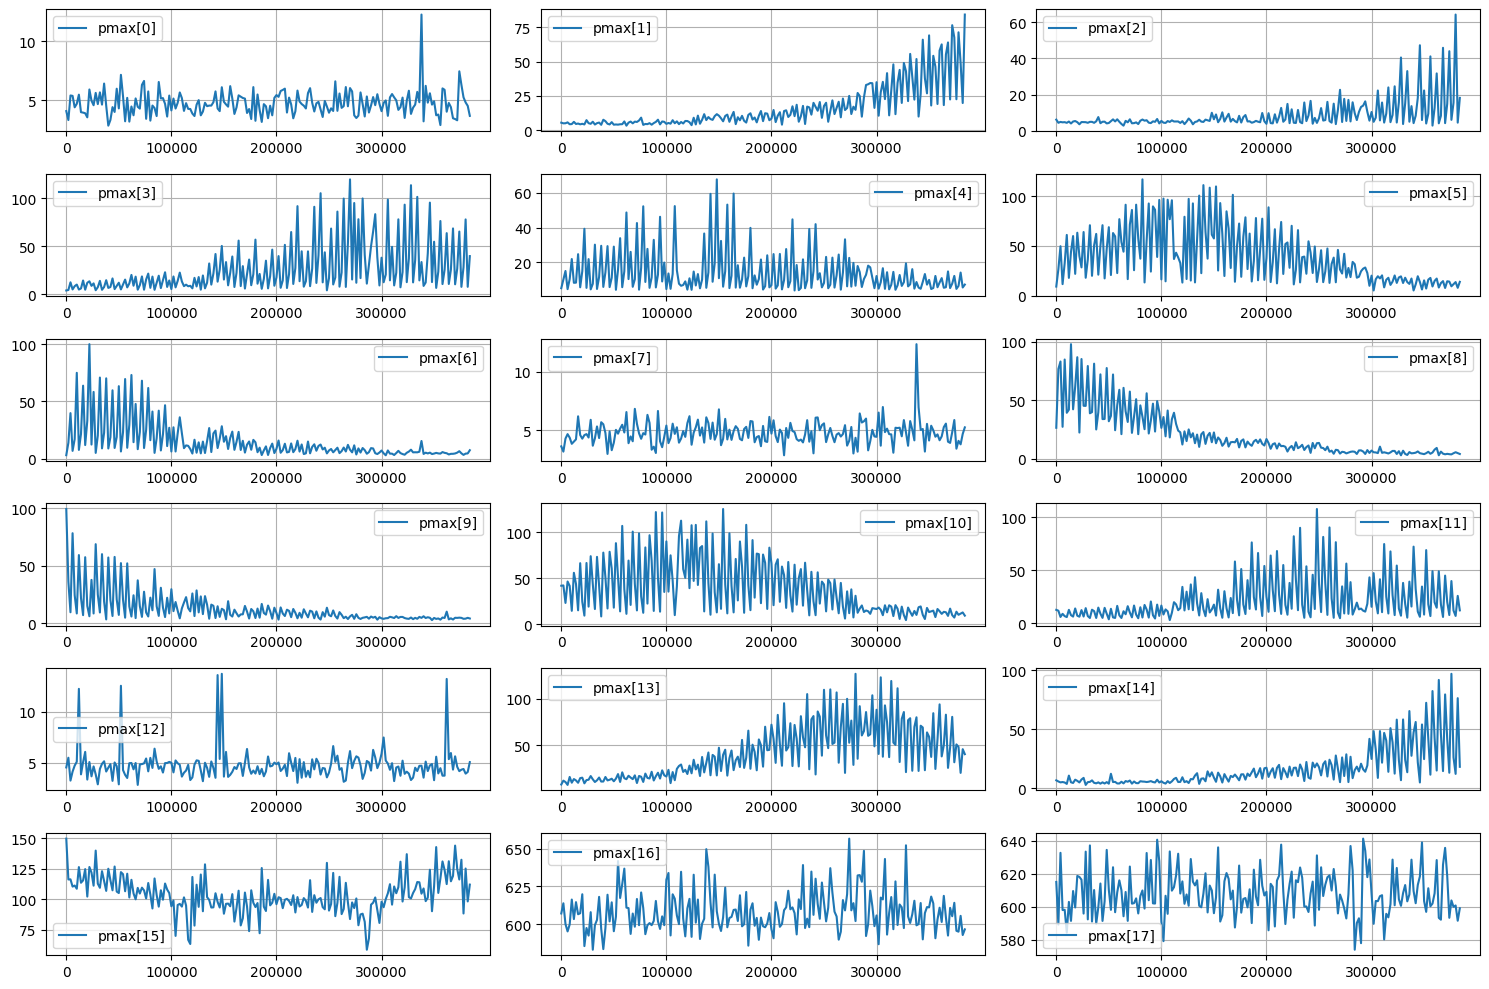

In [12]:
plot_data('pmax')

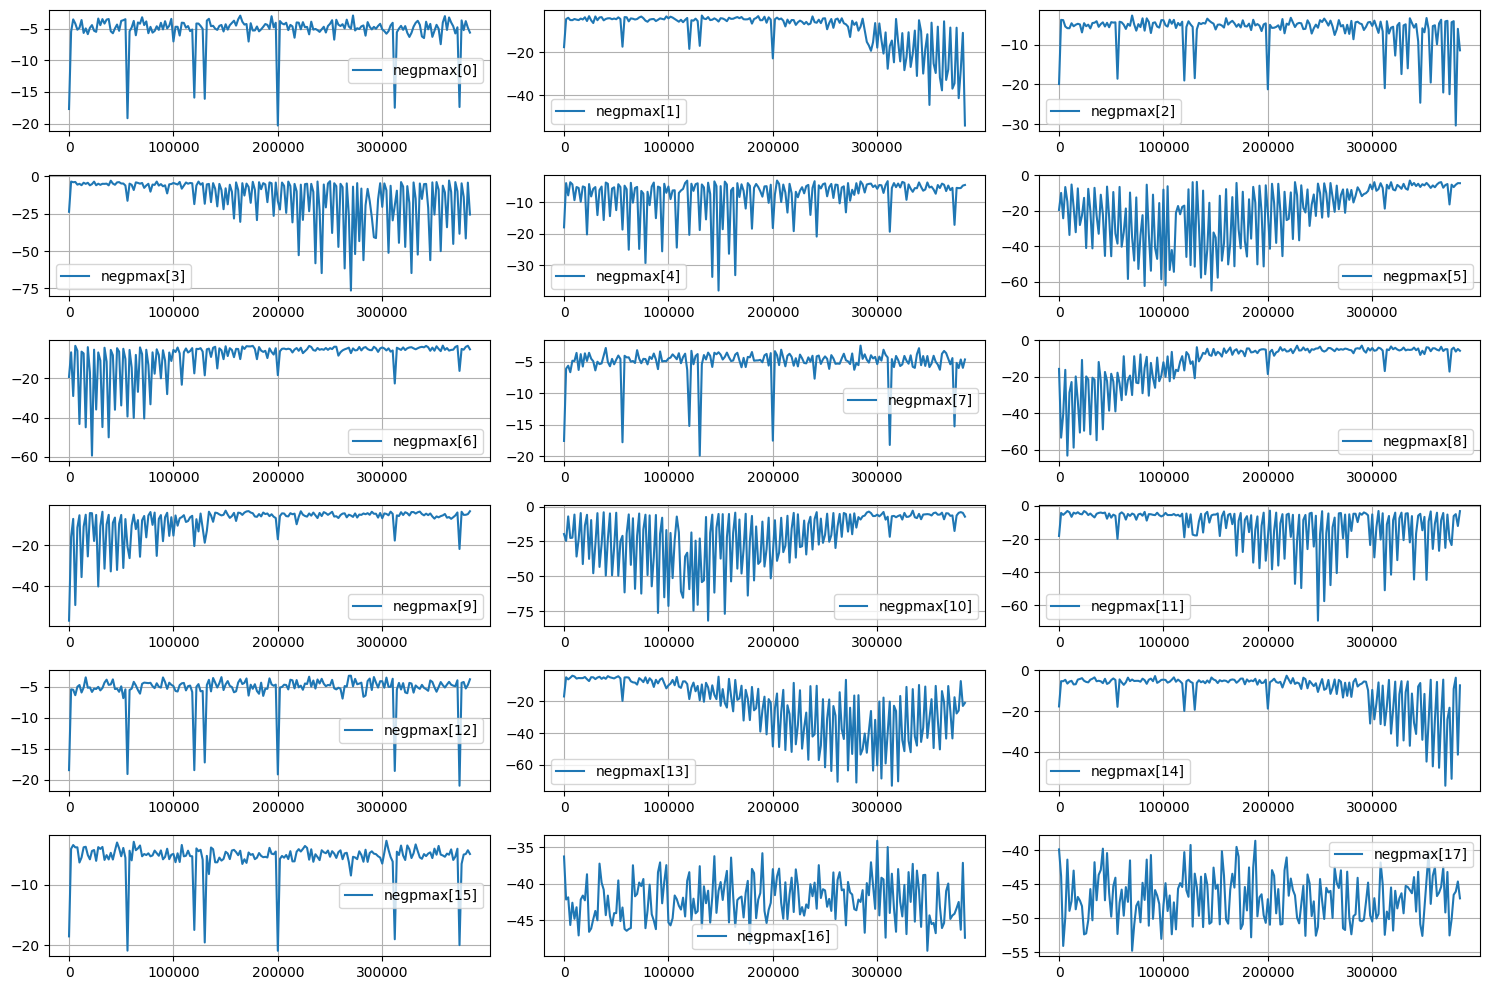

In [13]:
plot_data('negpmax')

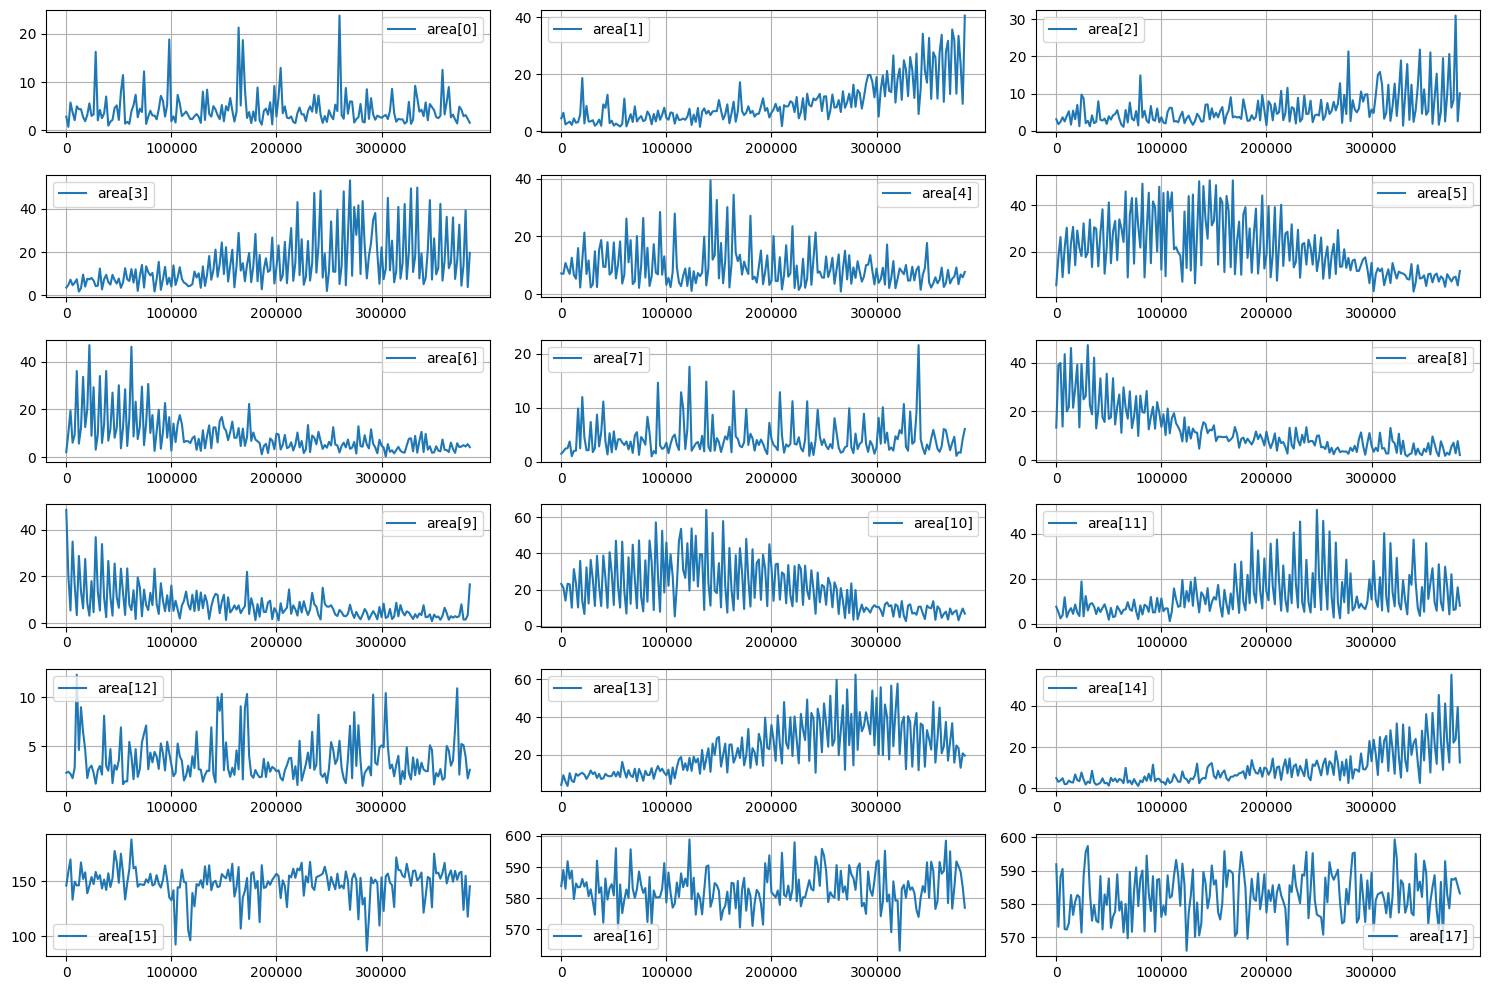

In [14]:
plot_data('area')

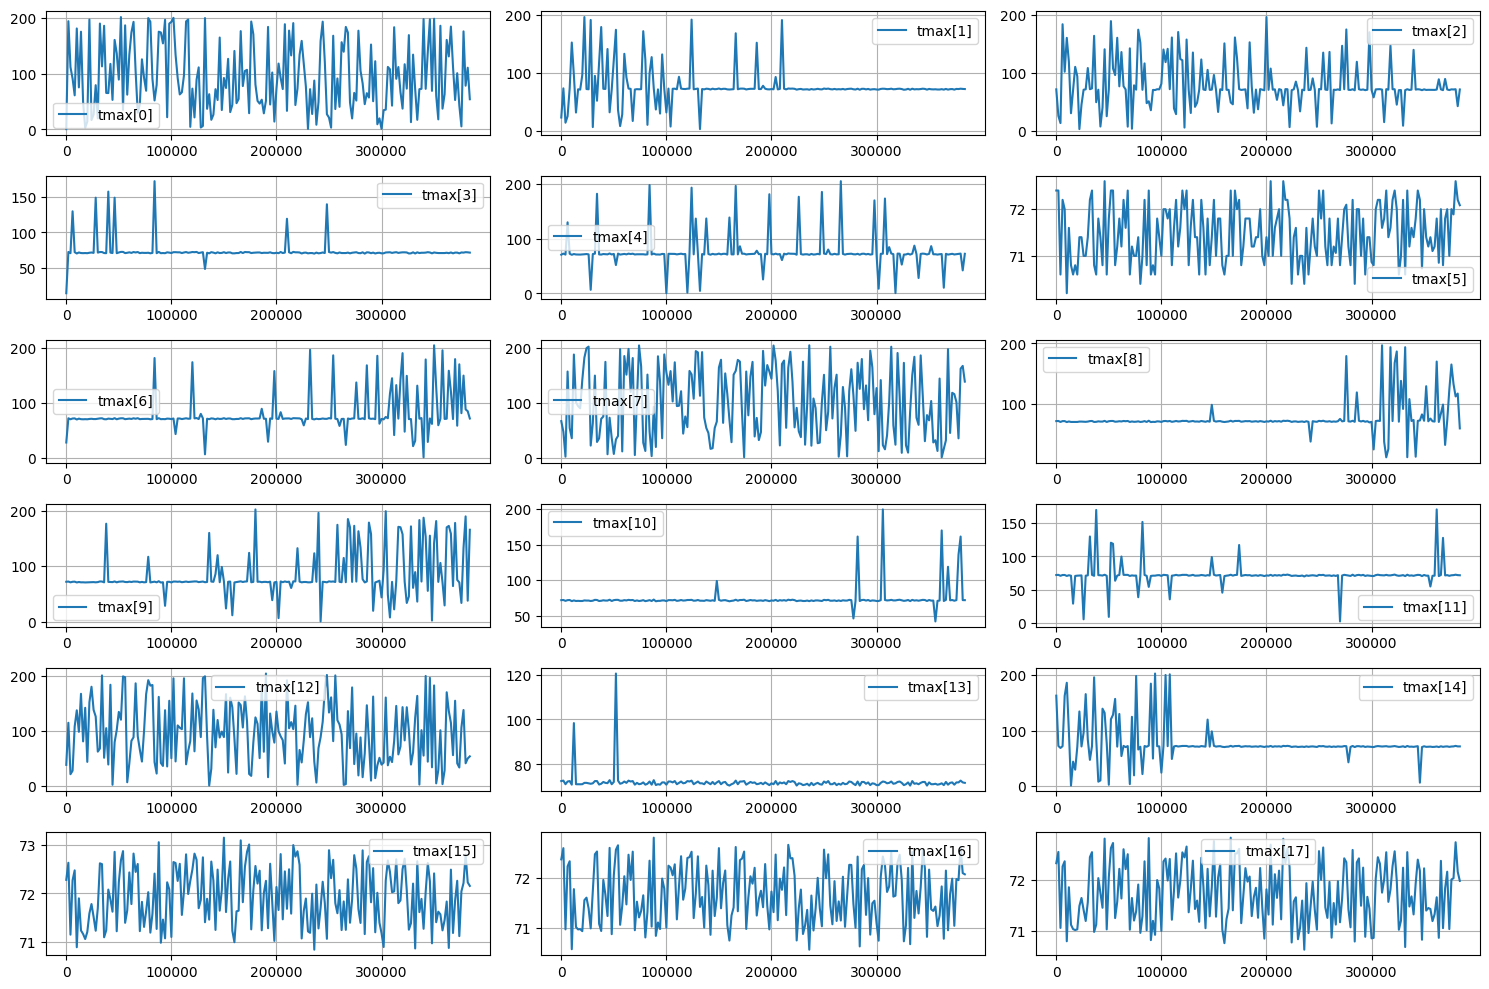

In [15]:
plot_data('tmax')

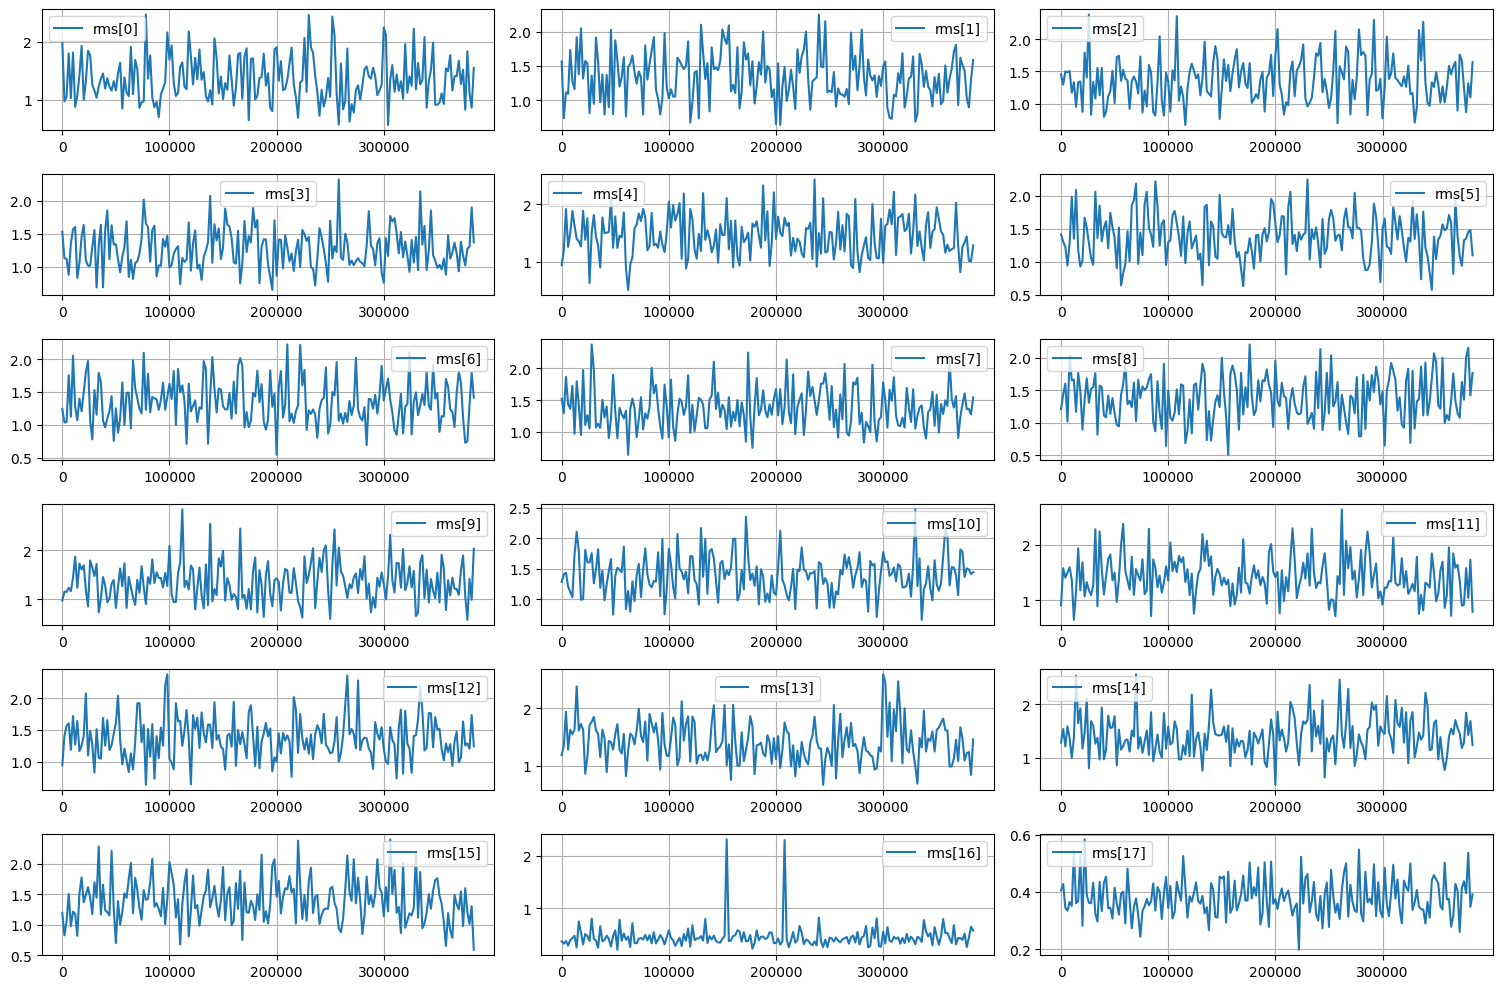

In [16]:
plot_data('rms')

### 1.2.3 Correlation between the columns

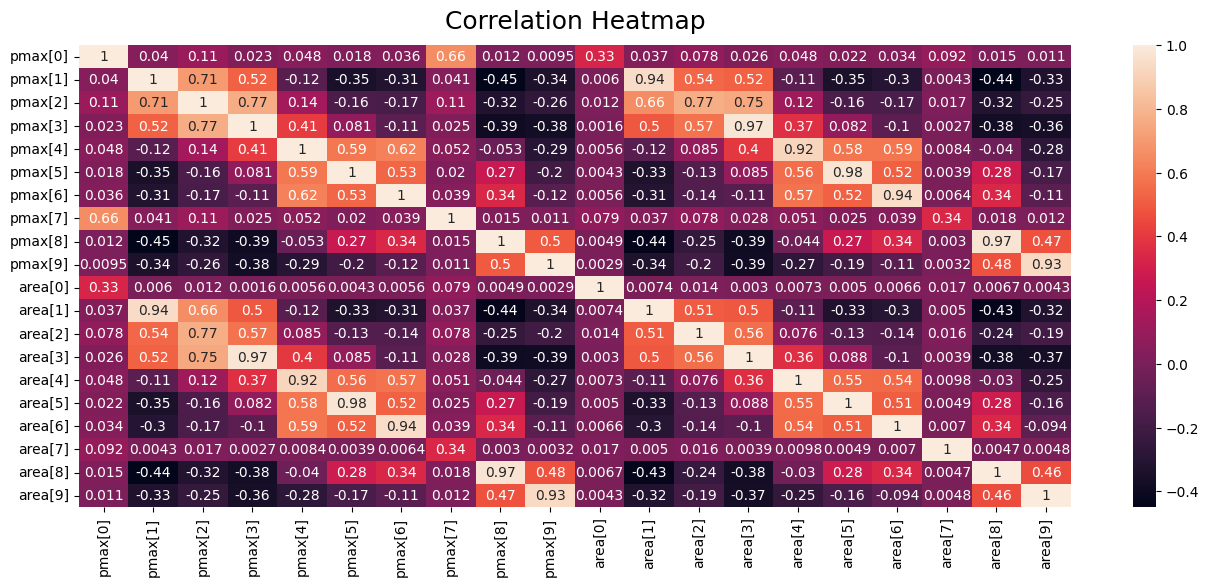

In [17]:
import seaborn as sns

columns = [f"pmax[{i}]" for i in range(10)] + [f"area[{i}]" for i in range(10)]

plt.figure(figsize=(16, 6))
sns.heatmap(df[columns].corr(method="pearson"), annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

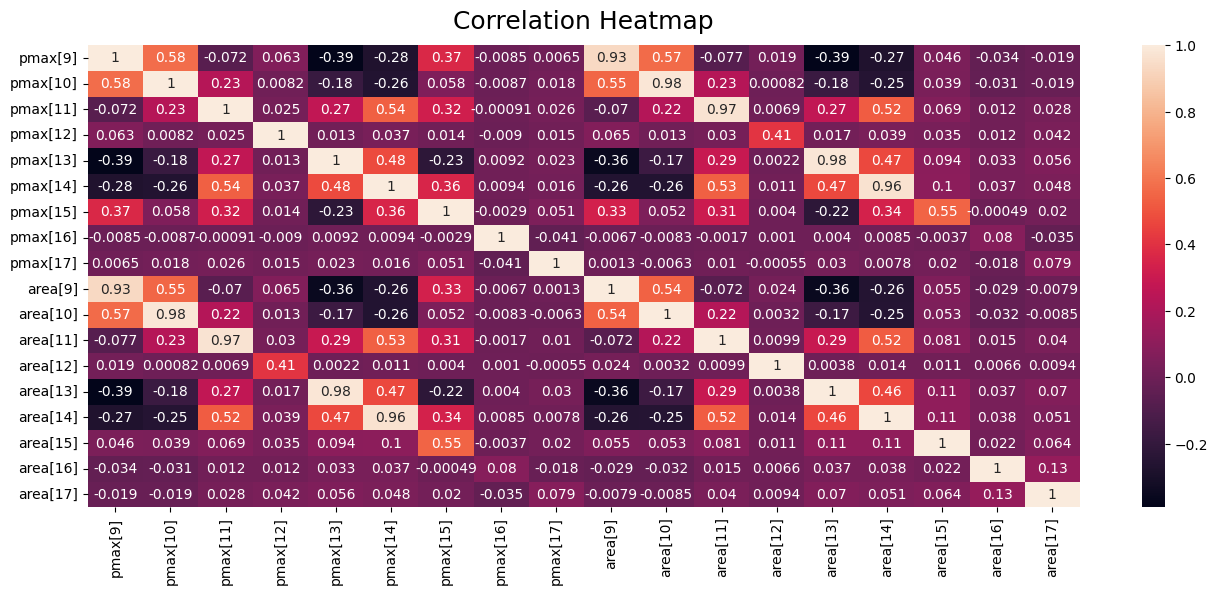

In [18]:
columns = [f"pmax[{i}]" for i in range(9,18)] + [f"area[{i}]" for i in range(9,18)]

plt.figure(figsize=(16, 6))
sns.heatmap(df[columns].corr(method="pearson"), annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

### 1.2.4 Dropping the selected columns

In [19]:
def dropping_columns(dataframe):
    return dataframe.drop(columns=["pmax[17]", "negpmax[17]", "area[17]", "tmax[17]",
                                   "pmax[16]", "negpmax[16]", "area[16]", "tmax[16]",
                                   "pmax[15]", "area[15]", "tmax[15]",
                                   "pmax[12]", "area[12]", "tmax[12]",
                                   "pmax[7]", "area[7]", "tmax[7]",
                                   "pmax[0]", "area[0]", "tmax[0]"] )

### 1.2.5 Other graphs used in the report

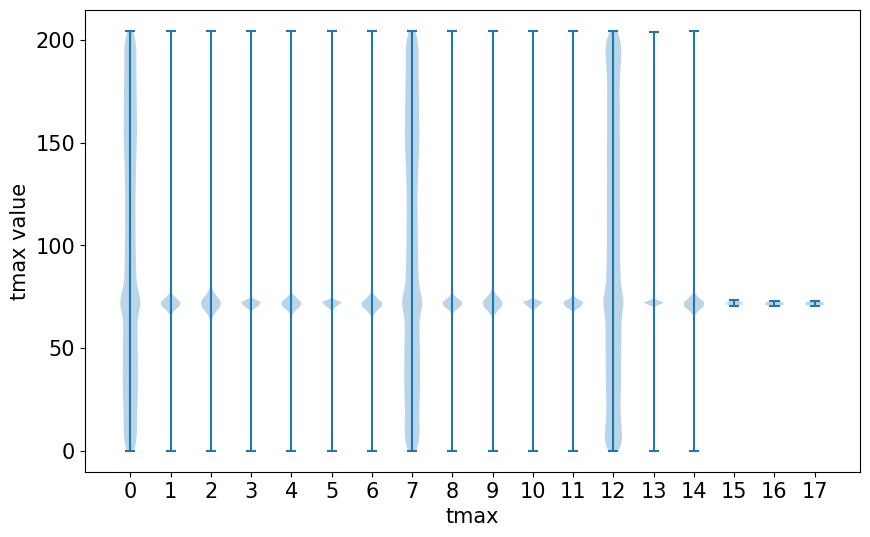

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
column_names = [f'tmax[{i}]' for i in range(18)]
violins = ax.violinplot(df[column_names], positions=range(18))

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xticks(range(18))
ax.set_xticklabels(range(18))

ax.set_xlabel('tmax', fontsize=15)
ax.set_ylabel('tmax value', fontsize=15)

plt.show()
fig.savefig('violinplot.png', format='png', dpi=600)


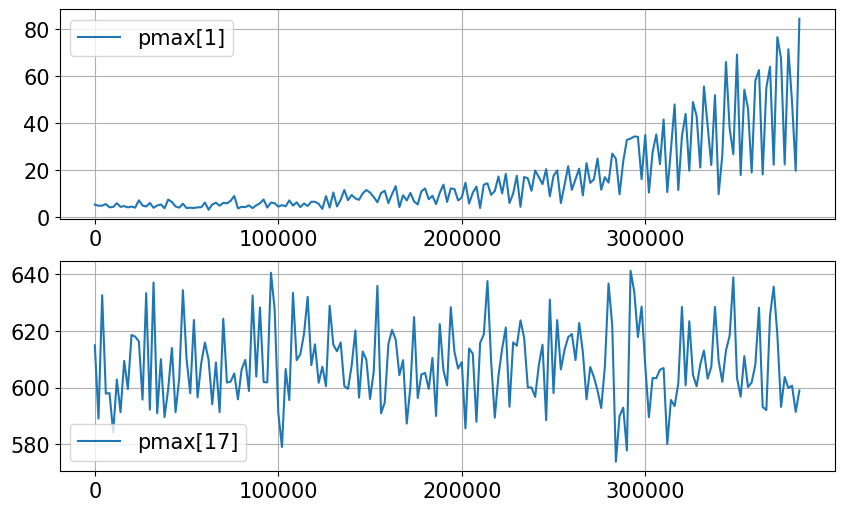

In [44]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))

n=2000

df_reset = df.reset_index()
df_downsampled = df_reset.iloc[::n, :]

column = "pmax[1]"
ax[0].plot(df_downsampled['index'], df_downsampled[column], label=column)
ax[0].set_xticks(np.arange(0, len(df_reset.index), step=100000))
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].grid()
ax[0].legend(fontsize=15)

column = "pmax[17]"
ax[1].plot(df_downsampled['index'], df_downsampled[column], label=column)
ax[1].set_xticks(np.arange(0, len(df_reset.index), step=100000))
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.show()
fig.savefig('pmaxgraphs.png', format='png', dpi=600)

## 1.3 Dropping infrequent x's values

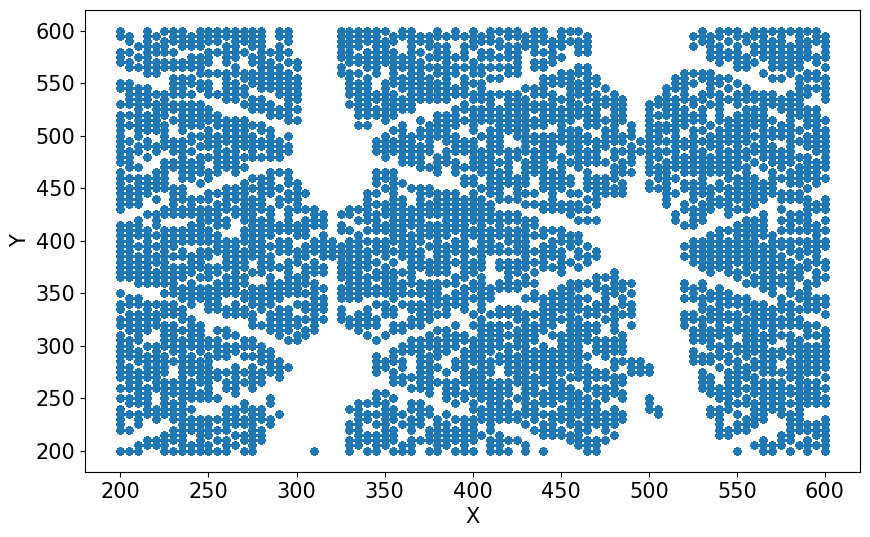

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='x', y='y', kind='scatter', ax=ax)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)

plt.show()
fig.savefig('xy_values.png', format='png', dpi=600)

In [22]:
df_drop = df[df['x'].map(df['x'].value_counts()) >= 2200]

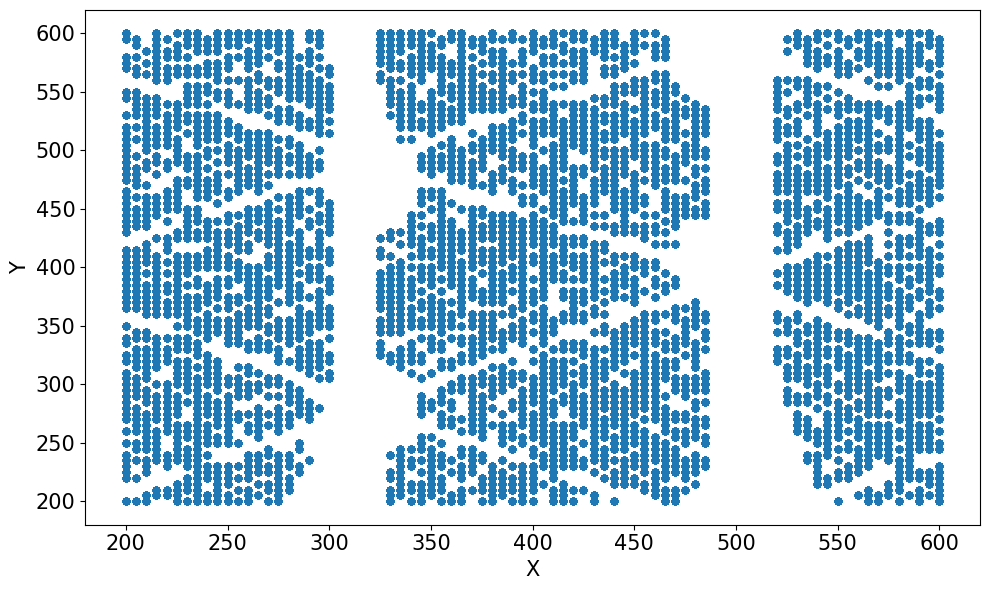

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
df_drop.plot(x='x', y='y', kind='scatter', ax=ax)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)

plt.tight_layout()
plt.show()

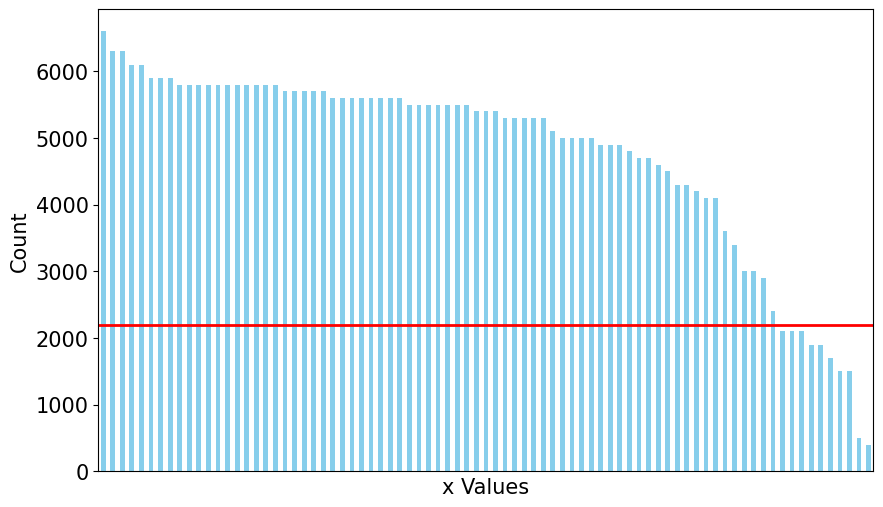

In [24]:
x_value_counts = df['x'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
x_value_counts.plot(kind='bar', color='skyblue')

ax.axhline(y=2200, color='red', linewidth=2)

ax.tick_params(axis='y', labelsize=15)
ax.set_xticks([])

ax.set_xlabel('x Values', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

plt.show()

fig.savefig('x_values.png', format='png', dpi=600)


# 2. Model Selection

## 2.1 Feature Selection

### 2.1.1 Custom evalutation metric for XGB

In [25]:
def custom_eval_metric(y_true, y_pred):
    distance = np.mean(np.sqrt((y_true[:, 0] - y_pred[:, 0]) ** 2 + (y_true[:, 1] - y_pred[:, 1]) ** 2))

    return 'custom_metric', distance

### 2.1.2 Computing distance

In [26]:
def euclidean_distance(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    return np.mean(np.sqrt((y_true[:, 0] - y_pred[:, 0]) ** 2 + (y_true[:, 1] - y_pred[:, 1]) ** 2))

### 2.1.3 Change columns name for XGB

In [27]:
# The model fit for XGB gives and error for the [] in the columns' name
def change_name(dataframe):
  dataframe.columns = [col.replace("[", "").replace("]", "") for col in dataframe.columns]
  return dataframe

### 2.1.3 Train XGB for feature selection

In [28]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

X = dropping_columns(df_drop)
X = X.drop(columns=["x", "y"])
X = change_name(X)
y = df_drop[["x", "y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultiOutputRegressor(xgb.XGBRegressor(eval_metric=custom_eval_metric, random_state=42))
model.fit(X_train, y_train)

y_hat = model.predict(X_test)
distance = euclidean_distance(y_test, y_hat)
print('Distance:', distance)

Distance: 6.249822249105532


In [29]:
feature_names = X.columns
sorted(zip(feature_names, model.estimators_[0].feature_importances_, model.estimators_[1].feature_importances_), key=lambda x: x[1], reverse=True)

[('pmax8', 0.6743127, 0.0010586458),
 ('pmax13', 0.1089177, 0.018150153),
 ('pmax5', 0.03411427, 0.033454873),
 ('pmax1', 0.029292712, 0.0016319184),
 ('pmax14', 0.027101923, 0.003909641),
 ('pmax10', 0.023974713, 0.12568282),
 ('negpmax3', 0.01583619, 0.01401789),
 ('negpmax1', 0.010851431, 0.00027824237),
 ('negpmax10', 0.008408555, 0.012315895),
 ('negpmax6', 0.008359279, 0.00026693652),
 ('negpmax5', 0.0072975676, 0.01173739),
 ('negpmax8', 0.0065897834, 0.0012450234),
 ('negpmax14', 0.006026783, 0.00016628414),
 ('negpmax11', 0.00583122, 0.0070441985),
 ('pmax6', 0.005789287, 0.0021731658),
 ('negpmax9', 0.00540837, 0.0017486037),
 ('negpmax13', 0.005080945, 0.022666134),
 ('pmax3', 0.0021072035, 0.1395479),
 ('pmax9', 0.0017042934, 0.0021428468),
 ('pmax2', 0.0016686039, 0.003363928),
 ('area9', 0.0012882256, 0.00042574134),
 ('pmax11', 0.0012530437, 0.019646155),
 ('pmax4', 0.0011613087, 0.56326354),
 ('area14', 0.0009745817, 8.418739e-05),
 ('negpmax4', 0.00089220837, 0.0043556

### 2.1.4 Feature selection function

In [30]:
def feature_selection(dataframe):
    return dataframe.drop(columns=[f'rms[{i}]' for i in range(18)])

## 2.2 Train-test split

In [31]:
X = df_drop.drop(columns=["x", "y"])
X = feature_selection(dropping_columns(X))
y = df_drop[["x", "y"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 2.3 Training the models

### 2.3.1 Feature Selection for random forest

In [32]:
def feature_selection_rf(dataframe):
    return dataframe.drop(columns=[col for col in dataframe.columns if col.startswith('tmax') or col.startswith('area')])

### 2.3.2 Training

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

models = [
    Ridge(random_state=42),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(change_name), list(X_train.columns))
             ),
        xgb.XGBRegressor(eval_metric=custom_eval_metric, random_state=42)),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(feature_selection_rf), list(X_train.columns))
             ),
        RandomForestRegressor(random_state=42))
]

model_names = [
    'Rigde',
    'XGB',
    'Random Forest'
]


In [34]:
from prettytable import PrettyTable

t = PrettyTable()
t.field_names = ['Model Name', 'Distance']

for model, model_name in zip(models, model_names):
    multimodel = MultiOutputRegressor(model)
    multimodel.fit(X_train, y_train)
    y_hat = multimodel.predict(X_test)
    distance = euclidean_distance(y_test, y_hat)
    t.add_row([model_name, distance])

print(t)

+---------------+--------------------+
|   Model Name  |      Distance      |
+---------------+--------------------+
|     Rigde     | 17.551873295200515 |
|      XGB      |  6.24994151545531  |
| Random Forest | 4.651415839803063  |
+---------------+--------------------+


# 3. Hyperparameter tuning

## 3.1 Random Forest (with GridSearchCV)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(euclidean_distance, greater_is_better=False)

reg = MultiOutputRegressor(RandomForestRegressor(random_state=42))
param_grid = {
    "estimator__max_depth": [7, None],
    "estimator__max_features":['auto', 'sqrt']
}
gridsearch = GridSearchCV(reg, param_grid, n_jobs = -1, scoring=custom_scorer, cv = 3)

res = gridsearch.fit(feature_selection_rf(X), y)

print("The best paramaters are:")
print(res.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


The best paramaters are:
{'estimator__max_depth': None, 'estimator__max_features': 'sqrt'}


In [36]:
X_eval = feature_selection_rf(feature_selection(dropping_columns(df_eval)))
X_eval = X_eval.drop(columns=["Id"])
y_eval = gridsearch.predict(X_eval)
y_eval = np.array(y_eval)

submission_df = pd.DataFrame({'Predicted': [f'{x:.1f}|{y:.1f}' for x, y in y_eval]})
submission_df.index.name = 'Id'
submission_df.to_csv('submission_randomforest.csv')

## 3.2 Ridge (with GridSearchCV)

In [37]:
reg = MultiOutputRegressor(Ridge(random_state=42))
param_grid = {
    'estimator__alpha': (np.logspace(-3, 4, 8)),
    'estimator__solver': ['auto', 'svd', 'sparse_cg', 'lsqr']
}

gridsearch = GridSearchCV(reg, param_grid, n_jobs = -1, scoring=custom_scorer, cv = 3)

res = gridsearch.fit(X, y)

print("The best paramaters are:")
print(res.best_params_)

The best paramaters are:
{'estimator__alpha': 0.1, 'estimator__solver': 'sparse_cg'}


In [38]:
X_eval = feature_selection(dropping_columns(df_eval))
X_eval = X_eval.drop(columns=["Id"])
y_eval = gridsearch.predict(X_eval)
y_eval = np.array(y_eval)

submission_df = pd.DataFrame({'Predicted': [f'{x:.1f}|{y:.1f}' for x, y in y_eval]})
submission_df.index.name = 'Id'
submission_df.to_csv('submission_ridge.csv')

## 3.2 XGB (with Optuna)

In [39]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.8 MB/s eta 0:00:00


In [40]:
import optuna

# The "fit" gives and error for the [] in the columns' name
X_train = change_name(X_train)
X_test = change_name(X_test)

def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int("n_estimators", 100, 300, step=100),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }
    model = MultiOutputRegressor(xgb.XGBRegressor(**params, eval_metric=custom_eval_metric, random_state=42))
    model.fit(X_train, y_train, verbose=False)
    predictions = model.predict(X_test)
    distance = euclidean_distance(y_test, predictions)
    return distance

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

[I 2024-01-25 13:13:46,557] A new study created in memory with name: no-name-57f1bf13-f20b-4590-a1a5-9c7db68b7fe9
[I 2024-01-25 13:15:07,224] Trial 0 finished with value: 6.289889877941299 and parameters: {'n_estimators': 200, 'learning_rate': 0.07969454818643935, 'max_depth': 8, 'subsample': 0.6187255599871848, 'colsample_bytree': 0.19821770842031466, 'min_child_weight': 4}. Best is trial 0 with value: 6.289889877941299.
[I 2024-01-25 13:15:34,497] Trial 1 finished with value: 16.96215945960278 and parameters: {'n_estimators': 100, 'learning_rate': 0.05399484409787434, 'max_depth': 7, 'subsample': 0.7226689489062432, 'colsample_bytree': 0.06955526958101232, 'min_child_weight': 20}. Best is trial 0 with value: 6.289889877941299.
[I 2024-01-25 13:16:05,278] Trial 2 finished with value: 84.11719170584385 and parameters: {'n_estimators': 300, 'learning_rate': 0.0026587543983272706, 'max_depth': 2, 'subsample': 0.22423428436076215, 'colsample_bytree': 0.3390301308115608, 'min_child_weight'

In [42]:
best_params = study.best_params

best_model = MultiOutputRegressor(xgb.XGBRegressor(**best_params, eval_metric=custom_eval_metric, random_state=42))
X = change_name(X)
best_model.fit(X, y)

X_eval = change_name(feature_selection(dropping_columns(df_eval)))
X_eval = X_eval.drop(columns=["Id"])
y_eval = best_model.predict(X_eval)
y_eval = np.array(y_eval)

submission_df = pd.DataFrame({'Predicted': [f'{x:.1f}|{y:.1f}' for x, y in y_eval]})
submission_df.index.name = 'Id'
submission_df.to_csv('submission_xgb.csv')
